# Showing the distribution of points under different sampling techniques


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import qmc                # Latin Hypercube & Halton
# Prime numbers are needed for the manual Hammersley implementation
from math import sqrt

In [1]:
# pip install --upgrade scipy

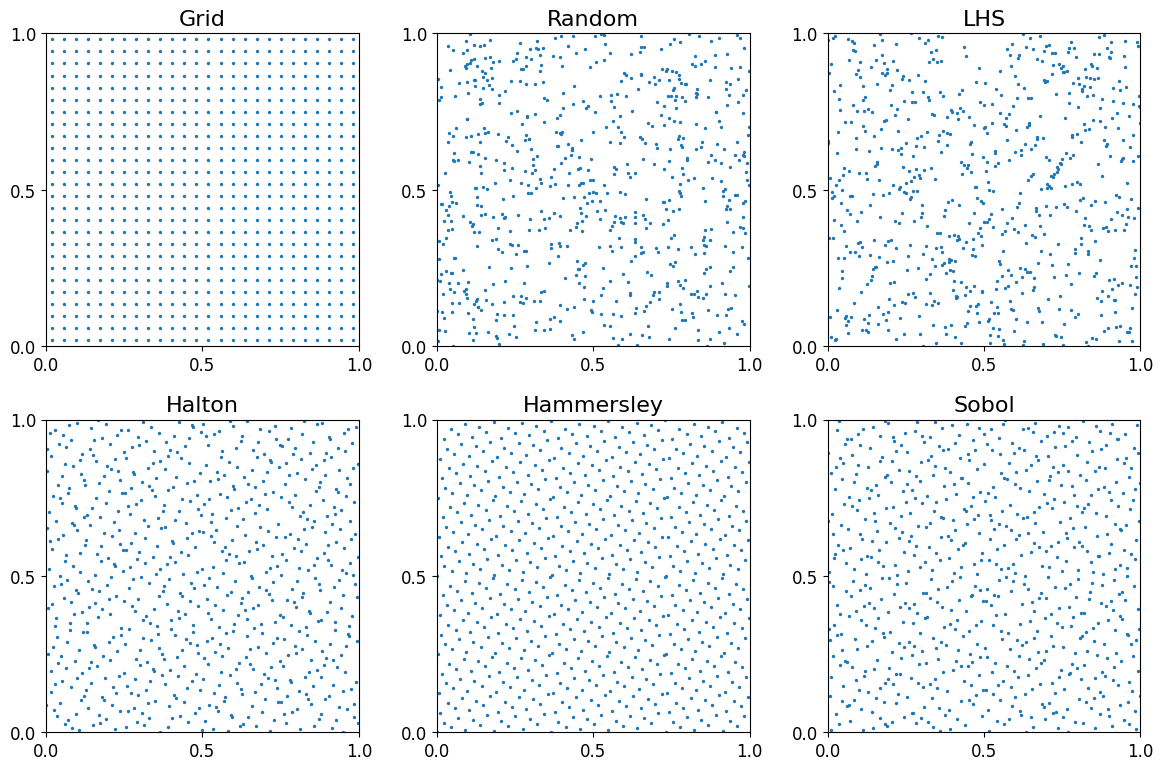

In [3]:
# --- Main Parameters ---
# Set the number of sample points to generate for each method.
N_POINTS = 700
# The number of dimensions is 2 for a 2D plot.
DIMS = 2

# --- Plotting Style ---
# Font sizes appropriate for a thesis figure.
TITLE_FONTSIZE = 16
LABEL_FONTSIZE = 12
MARKER_SIZE = 8 # Small dot markers

# --- Create the Figure ---
fig, axes = plt.subplots(2, 3, figsize=(12, 8))
axes = axes.ravel()

# Use a fixed seed for random number generation to make the plots reproducible.
SEED = 42
rng = np.random.default_rng(SEED)

# --- [FIX] Custom Hammersley Set Implementation ---
# This function generates the Hammersley set manually to avoid version issues.

def get_primes(n):
    """Helper function to get the first n prime numbers."""
    primes = []
    num = 2
    while len(primes) < n:
        is_prime = all(num % p != 0 for p in primes)
        if is_prime:
            primes.append(num)
        num += 1
    return primes

def van_der_corput(i, base):
    """Calculates the van der Corput sequence value for index i and a given base."""
    result = 0.0
    p = 1.0 / base
    while i > 0:
        result += (i % base) * p
        i //= base
        p /= base
    return result

def hammersley_set_manual(n_points, n_dims):
    """
    Generates the Hammersley set for a given number of points and dimensions.
    This works without relying on a specific SciPy version.
    """
    samples = np.zeros((n_points, n_dims))
    primes = get_primes(n_dims - 1)
    
    for i in range(n_points):
        # First dimension is i / n
        samples[i, 0] = i / n_points
        # Subsequent dimensions use the van der Corput sequence with prime bases
        for j in range(1, n_dims):
            samples[i, j] = van_der_corput(i, primes[j - 1])
            
    return samples
# --- End of Fix ---


# --- Define Sampling Methods and Titles ---
titles = ['Grid', 'Random', 'LHS', 'Halton', 'Hammersley', 'Sobol']

# 1. Grid Sampler
n_per_dim = int(np.sqrt(N_POINTS))
grid_coords = np.linspace(0, 1, n_per_dim, endpoint=False) + 1 / (2 * n_per_dim)
x, y = np.meshgrid(grid_coords, grid_coords)
grid_samples = np.vstack([x.ravel(), y.ravel()]).T

# 2. Random Sampler
random_samples = rng.random((N_POINTS, DIMS))

# 3. Latin Hypercube Sampler
lhs_sampler = qmc.LatinHypercube(d=DIMS, seed=SEED)
lhs_samples = lhs_sampler.random(n=N_POINTS)

# 4. Halton Sequence Sampler
halton_sampler = qmc.Halton(d=DIMS, seed=SEED)
halton_samples = halton_sampler.random(n=N_POINTS)

# 5. Hammersley Set Sampler (using our custom function)
hammersley_samples = hammersley_set_manual(N_POINTS, DIMS)

# 6. Sobol Sequence Sampler
sobol_sampler = qmc.Sobol(d=DIMS, seed=SEED)
sobol_samples = sobol_sampler.random(n=N_POINTS)

# Store all generated samples in a list
all_samples = [
    grid_samples,
    random_samples,
    lhs_samples,
    halton_samples,
    hammersley_samples,
    sobol_samples
]

# --- Generate All Plots ---
for i, (ax, title, samples) in enumerate(zip(axes, titles, all_samples)):
    ax.scatter(samples[:, 0], samples[:, 1], s=MARKER_SIZE, marker='.')
    
    # --- Style Each Subplot ---
    ax.set_title(title, fontsize=TITLE_FONTSIZE)
    ax.set_aspect('equal')
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.set_xticks([0, 0.5, 1])
    ax.set_yticks([0, 0.5, 1])
    ax.tick_params(axis='both', which='major', labelsize=LABEL_FONTSIZE)

# Adjust layout to prevent titles/labels from overlapping
plt.tight_layout(pad=2.0)

# To save the figure for your thesis (with high resolution)
# plt.savefig("sampling_techniques.png", dpi=300, bbox_inches='tight')

# Display the plot
plt.show()